# Important Packages:

In [219]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import urllib
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import urllib.request
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples,silhouette_score
from array import *
from nltk.probability import FreqDist
import squarify
from itertools import chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import pickle
from yellowbrick.cluster import KElbowVisualizer
import pysentiment2 as ps
from nrclex import NRCLex
from nltk.corpus import sentiwordnet as swn
from nltk import pos_tag
from nltk import map_tag
import ssl
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns

# URL Collection:

In [220]:
rbi_speeches_url = ['https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1072', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1073', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1074', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1075', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1076', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1077', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1078', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1079', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1080', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1081', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1082', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1083', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1084',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1123',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1118',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1085', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1086', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1087', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1088', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1089',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1121',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1090', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1091', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1092', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1093',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1115',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1094',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1095',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1116',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1096', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1097', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1098', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1099', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1100', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1101', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1102', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1103',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1104',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1120',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1105',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1114',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1106', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1107',  
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1109', 
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1110',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1112',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1111',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1113',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1117',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1119',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1122',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1124',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1125',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1127',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1128',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1129',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1133',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1135',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1136',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1137',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1138',
                    'https://www.rbi.org.in/Scripts/BS_SpeechesView.aspx?Id=1139',]

# Dataframe Initialization:

In [221]:
rbi_speeches = pd.DataFrame()
rbi_speeches['urls'] = rbi_speeches_url
rbi_speeches['content'] = "will be filled"

# RBI Speeches Scraping (April 2019 - till date):

In [222]:
content=[]
for i in range(0,len(rbi_speeches_url),1):
    weburl  = urllib.request.urlopen(rbi_speeches_url[i])
    htmlparse = BeautifulSoup(weburl.read(), 'html.parser')
    for para in htmlparse.find_all("td"):
        raw = para.get_text()
        content.append(raw)
    rbi_speeches.at[i,"content"] = content
    content = []

# Date Extraction:

In [223]:
rbi_speeches['date'] = "will be filled"
for i in range(0,len(rbi_speeches),1):
    rbi_speeches.loc[i,'date'] = rbi_speeches['content'][i][1]

# Title Extraction:

In [224]:
rbi_speeches['title'] = "will be filled"
for i in range(0,len(rbi_speeches),1):
    rbi_speeches.loc[i,'title'] = rbi_speeches['content'][i][2]

# Speaker Name:

In [225]:
rbi_speeches['speaker_name'] = "will be filled"
for i in range(0,len(rbi_speeches),1):
    mystring = rbi_speeches['title'][i]
    keyword = 'Reserve Bank of India'
    before_keyword, keyword, after_keyword = mystring.partition(keyword)
    rbi_speeches.loc[i,'speaker_name'] = before_keyword

In [226]:
for i in range(0,len(rbi_speeches['speaker_name']),1) :
    mystring = rbi_speeches['speaker_name'][i]
    keyword = 'Shri'
    before_keyword, keyword, after_keyword = mystring.partition(keyword)
    if len(after_keyword) > 2 :
        rbi_speeches.loc[i,'speaker_name'] = after_keyword
    else :
        keyword = 'Dr.'
        before_keyword, keyword, after_keyword = mystring.partition(keyword)
        rbi_speeches.loc[i,'speaker_name'] = after_keyword

In [227]:
rbi_speeches['speaker_name'][5] = 'Shaktikanta Das, Governor,'
rbi_speeches['speaker_name'][6] = 'Shaktikanta Das, Governor,'
rbi_speeches['speaker_name'][8] = 'Shaktikanta Das, Governor,'
rbi_speeches['speaker_name'][11] = 'B.P Kanungo, Deputy Governor'
rbi_speeches['speaker_name'][24] = 'President of India'
rbi_speeches['speaker_name'][29] = 'Shaktikanta Das, Governor,'

In [231]:
for i in range(0,len(rbi_speeches['speaker_name']),1) :
    rbi_speeches['speaker_name'][i] = rbi_speeches['speaker_name'][i].strip()

# Relevant Content Extraction:

In [232]:
rbi_speeches['updated_content'] = "will be filled"
for i in range(0,len(rbi_speeches),1):
    rbi_speeches.loc[i,'updated_content'] = rbi_speeches["content"][i][3:4:1]

# Date Column Cleaning:

In [233]:
def clean_date(text):
    text_clean = text.replace('Date :', '')
    return text_clean

rbi_speeches['date'] = rbi_speeches['date'].apply(lambda x: clean_date(x))

# Content Cleaning:

In [234]:
def clean(text):
    # text_clean = ' '.join(text)
    text_clean = text
    text_clean = text_clean.replace('\xa0', ' ')
    text_clean = text_clean.replace('\r', ' ')
    text_clean = text_clean.replace('\n', ' ')
    return text_clean

rbi_speeches['content_clean'] = rbi_speeches['updated_content'].apply(lambda x: clean(x))

rbi_speeches.head(2)

,urls,content,date,title,speaker_name,updated_content,content_clean
0,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (55 kb), Date : Apr 13, 2019, Global Risks ...","Apr 13, 2019",Global Risks and Policy Challenges facing Eme...,"Shaktikanta Das, Governor,",Thank you for inviting me to this forum. I i...,Thank you for inviting me to this forum. I i...
1,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (95 kb), Date : Apr 25, 2019, 17th C.D. Des...","Apr 25, 2019",17th C.D. Deshmukh Memorial Lecture(Opening re...,"Shaktikanta Das, Governor,","On behalf of the Reserve Bank of India, I am...","On behalf of the Reserve Bank of India, I am..."


# Punctuation Cleaning:

In [235]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

rbi_speeches['content_clean'] = rbi_speeches['content_clean'].apply(lambda x: remove_punct(x))

rbi_speeches.head(2)

,urls,content,date,title,speaker_name,updated_content,content_clean
0,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (55 kb), Date : Apr 13, 2019, Global Risks ...","Apr 13, 2019",Global Risks and Policy Challenges facing Eme...,"Shaktikanta Das, Governor,",Thank you for inviting me to this forum. I i...,Thank you for inviting me to this forum I in...
1,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (95 kb), Date : Apr 25, 2019, 17th C.D. Des...","Apr 25, 2019",17th C.D. Deshmukh Memorial Lecture(Opening re...,"Shaktikanta Das, Governor,","On behalf of the Reserve Bank of India, I am...",On behalf of the Reserve Bank of India I am ...


# Tokenization:

In [236]:
rbi_speeches['content_tokenized'] = rbi_speeches['content_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))
rbi_speeches.head(2)

,urls,content,date,title,speaker_name,updated_content,content_clean,content_tokenized
0,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (55 kb), Date : Apr 13, 2019, Global Risks ...","Apr 13, 2019",Global Risks and Policy Challenges facing Eme...,"Shaktikanta Das, Governor,",Thank you for inviting me to this forum. I i...,Thank you for inviting me to this forum I in...,"[thank, you, for, inviting, me, to, this, foru..."
1,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (95 kb), Date : Apr 25, 2019, 17th C.D. Des...","Apr 25, 2019",17th C.D. Deshmukh Memorial Lecture(Opening re...,"Shaktikanta Das, Governor,","On behalf of the Reserve Bank of India, I am...",On behalf of the Reserve Bank of India I am ...,"[on, behalf, of, the, reserve, bank, of, india..."


# Stopwords Cleaning:

In [237]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

rbi_speeches['content_nostop'] = rbi_speeches['content_tokenized'].apply(lambda x: remove_stopwords(x))

rbi_speeches.head(2)

,urls,content,date,title,speaker_name,updated_content,content_clean,content_tokenized,content_nostop
0,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (55 kb), Date : Apr 13, 2019, Global Risks ...","Apr 13, 2019",Global Risks and Policy Challenges facing Eme...,"Shaktikanta Das, Governor,",Thank you for inviting me to this forum. I i...,Thank you for inviting me to this forum I in...,"[thank, you, for, inviting, me, to, this, foru...","[thank, inviting, forum, intend, cover, global..."
1,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (95 kb), Date : Apr 25, 2019, 17th C.D. Des...","Apr 25, 2019",17th C.D. Deshmukh Memorial Lecture(Opening re...,"Shaktikanta Das, Governor,","On behalf of the Reserve Bank of India, I am...",On behalf of the Reserve Bank of India I am ...,"[on, behalf, of, the, reserve, bank, of, india...","[behalf, reserve, bank, india, delighted, welc..."


# Lemmatization:

In [238]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

rbi_speeches['content_lemmatized'] = rbi_speeches['content_nostop'].apply(lambda x: lemmatizing(x))

rbi_speeches.head(2)

,urls,content,date,title,speaker_name,updated_content,content_clean,content_tokenized,content_nostop,content_lemmatized
0,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (55 kb), Date : Apr 13, 2019, Global Risks ...","Apr 13, 2019",Global Risks and Policy Challenges facing Eme...,"Shaktikanta Das, Governor,",Thank you for inviting me to this forum. I i...,Thank you for inviting me to this forum I in...,"[thank, you, for, inviting, me, to, this, foru...","[thank, inviting, forum, intend, cover, global...","[thank, inviting, forum, intend, cover, global..."
1,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (95 kb), Date : Apr 25, 2019, 17th C.D. Des...","Apr 25, 2019",17th C.D. Deshmukh Memorial Lecture(Opening re...,"Shaktikanta Das, Governor,","On behalf of the Reserve Bank of India, I am...",On behalf of the Reserve Bank of India I am ...,"[on, behalf, of, the, reserve, bank, of, india...","[behalf, reserve, bank, india, delighted, welc...","[behalf, reserve, bank, india, delighted, welc..."


# Content W/O Number:

In [53]:
rbi_speeches['w/o_num'] = "will be filled"
wolist = []
for i in range(0,len(rbi_speeches),1) :
    
    for j in range(0,len(rbi_speeches['content_nostop'][i]),1) :
        
        text = rbi_speeches['content_nostop'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    rbi_speeches.at[i,"w/o_num"] = wolist
    wolist=[]

rbi_speeches.head(2)

,urls,content,date,title,updated_content,content_clean,content_tokenized,content_nostop,content_lemmatized,w/o_num
0,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (55 kb), Date : Apr 13, 2019, Global Risks ...","Apr 13, 2019",Global Risks and Policy Challenges facing Eme...,Thank you for inviting me to this forum. I i...,Thank you for inviting me to this forum I in...,"[thank, you, for, inviting, me, to, this, foru...","[thank, inviting, forum, intend, cover, global...","[thank, inviting, forum, intend, cover, global...","[thank, inviting, forum, intend, cover, global..."
1,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (95 kb), Date : Apr 25, 2019, 17th C.D. Des...","Apr 25, 2019",17th C.D. Deshmukh Memorial Lecture(Opening re...,"On behalf of the Reserve Bank of India, I am...",On behalf of the Reserve Bank of India I am ...,"[on, behalf, of, the, reserve, bank, of, india...","[behalf, reserve, bank, india, delighted, welc...","[behalf, reserve, bank, india, delighted, welc...","[behalf, reserve, bank, india, delighted, welc..."


In [55]:
rbi_speeches['w/o_num_lemm'] = "will be filled"
wolist = []
for i in range(0,len(rbi_speeches),1) :
    
    for j in range(0,len(rbi_speeches['content_lemmatized'][i]),1) :
        
        text = rbi_speeches['content_lemmatized'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    rbi_speeches.at[i,"w/o_num_lemm"] = wolist
    wolist=[]

rbi_speeches.head(2)

,urls,content,date,title,updated_content,content_clean,content_tokenized,content_nostop,content_lemmatized,w/o_num,w/o_num_lemm
0,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (55 kb), Date : Apr 13, 2019, Global Risks ...","Apr 13, 2019",Global Risks and Policy Challenges facing Eme...,Thank you for inviting me to this forum. I i...,Thank you for inviting me to this forum I in...,"[thank, you, for, inviting, me, to, this, foru...","[thank, inviting, forum, intend, cover, global...","[thank, inviting, forum, intend, cover, global...","[thank, inviting, forum, intend, cover, global...","[thank, inviting, forum, intend, cover, global..."
1,https://www.rbi.org.in/Scripts/BS_SpeechesView...,"[ (95 kb), Date : Apr 25, 2019, 17th C.D. Des...","Apr 25, 2019",17th C.D. Deshmukh Memorial Lecture(Opening re...,"On behalf of the Reserve Bank of India, I am...",On behalf of the Reserve Bank of India I am ...,"[on, behalf, of, the, reserve, bank, of, india...","[behalf, reserve, bank, india, delighted, welc...","[behalf, reserve, bank, india, delighted, welc...","[behalf, reserve, bank, india, delighted, welc...","[behalf, reserve, bank, india, delighted, welc..."


# Removing words having length less than 3:

In [58]:
def short_remove(x):
    
    sh_list = []

    for j in range(0,len(rbi_speeches),1) :
    
        for i in range(0,len(rbi_speeches[x][j])) :
        
            if len(rbi_speeches[x][j][i]) > 2:
            
                main = rbi_speeches[x][j][i]
                sh_list.append(main)
    
        rbi_speeches.at[j,x] = sh_list
        sh_list=[]

In [59]:
short_remove('content_nostop')
short_remove('content_lemmatized')
short_remove('w/o_num')
short_remove('w/o_num_lemm')

# Covid Lexicon:

In [60]:
c_lex = ['epidemic','coronavirus','outbreak','corona','pandemic','virus','contagious','wuhan','covid','strain','outbreaks','communicable',
         'quarantines','epidemics','pandemics','infectious','respiratory','distancing','infected','pathogenic','quarantine','viral',
         'antiviral','infection','infections','vaccine','cov','shutdowns','strains','vaccines','vaccination','viruses','mrna','transmitted','covid19']

# Relative Frequency Calculator for individual words:

In [61]:
table_wo_num = rbi_speeches[['date','title','w/o_num']]
sumh = 0

for word in c_lex :
    
    table_wo_num[word] = "will be filled"
    
    for j in range(0,len(rbi_speeches),1) :
        
        for i in range(0,len(rbi_speeches['w/o_num'][j])) :
        
            if rbi_speeches['w/o_num'][j][i] == word :
            
                sumh = sumh + 1
    
        relfreq = sumh/len(rbi_speeches['w/o_num'][j])
        table_wo_num.loc[j,word] = relfreq
        sumh =  0

<ipython-input-61-5cd4bf84d52f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_wo_num[word] = "will be filled"
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Total Frequency:

In [62]:
table_wo_num["TotalRelFrequency"] = "will be filled"
for i in range(0,len(table_wo_num),1):
    a = table_wo_num.loc[i,c_lex]
    sumh = a[0]
    for j in range(1,35,1):
        sumh = sumh + a[j]
    table_wo_num.loc[i,"TotalRelFrequency"] = sumh
    sumh = 0

In [63]:
table_wo_num["TotalCovidWords"] = "will be filled"
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"TotalCovidWords"] = len(rbi_speeches['w/o_num'][i]) * table_wo_num.iloc[i,38]

In [64]:
table_wo_num.insert(1, 'Date', "will be filled")

In [65]:
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"Date"] = table_wo_num['date'][i][2:5:]+str(",")+table_wo_num['date'][i][10:14:]

In [66]:
table_wo_num["TotalWords"] = "will be filled"

In [67]:
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"TotalWords"] = len(rbi_speeches['w/o_num'][i])

In [250]:
# colind = [0] + [2] + [i for i in range(4,42,1)]

In [251]:
# table_wo_num[table_wo_num.columns[colind]].to_csv('RBI_speeches.csv')

In [68]:
col = [1]+[ i for i in range(4,40,1)] + [41]

In [69]:
FreqTable = table_wo_num[table_wo_num.columns[col]]

In [70]:
for j in range(0,len(FreqTable),1):
    
    for i in range(1,37,1):
        
        FreqTable.iloc[j,i] = FreqTable.iloc[j,i]*FreqTable.iloc[j,37]

C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [71]:
FreqTable = FreqTable.groupby(['Date'],sort=False).sum()

In [72]:
FreqTable = FreqTable.reset_index()

In [73]:
for j in range(0,len(FreqTable),1):
    
    for i in range(1,37,1):
        
        FreqTable.iloc[j,i] = FreqTable.iloc[j,i]/FreqTable.iloc[j,37]

In [74]:
FreqTable.index = pd.to_datetime(FreqTable['Date'])

# Frequency Plot:

C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.py

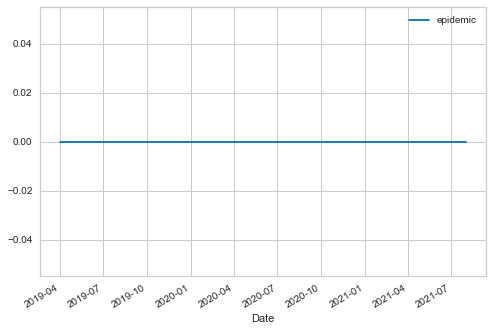

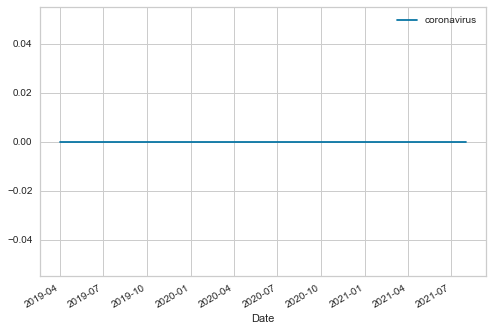

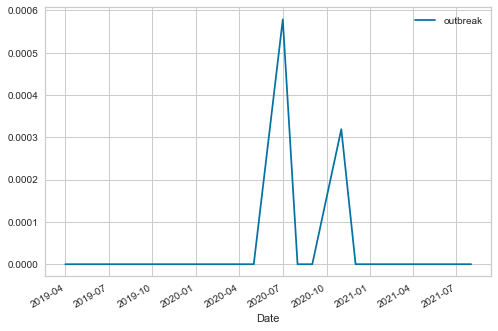

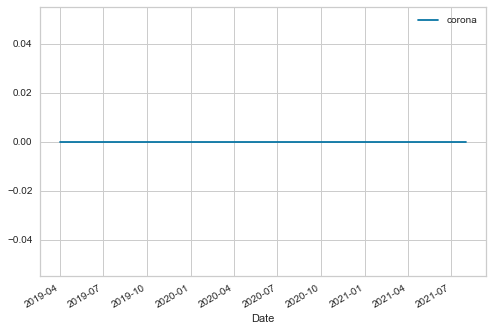

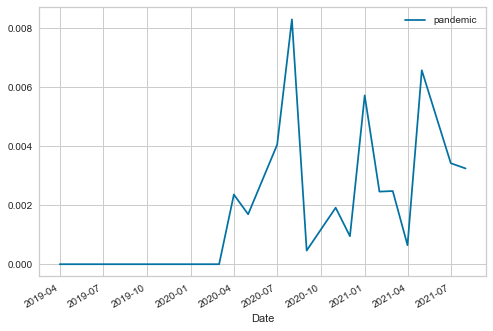

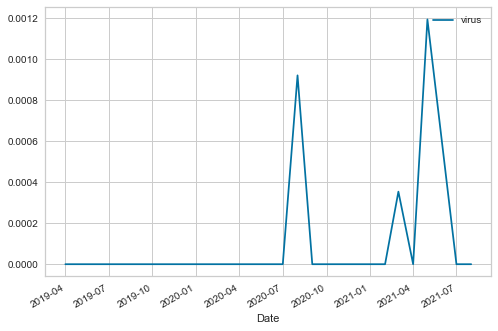

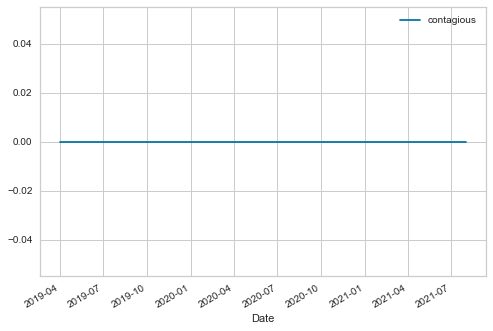

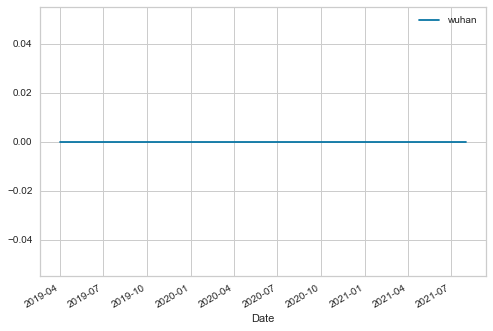

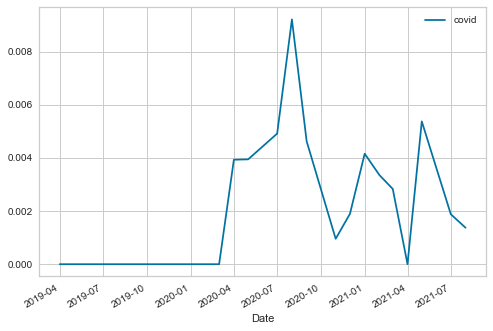

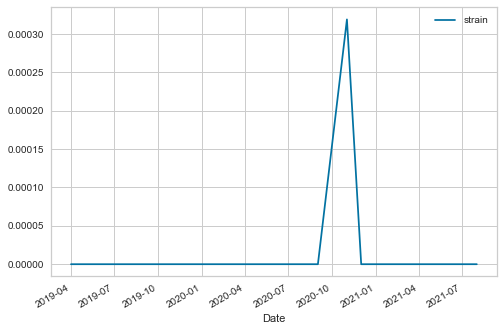

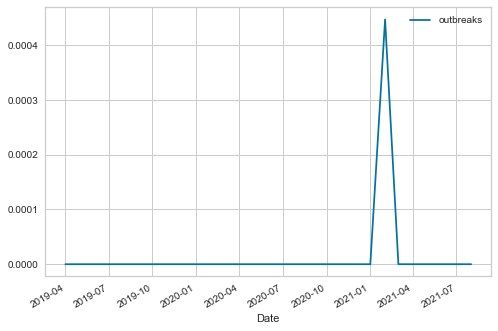

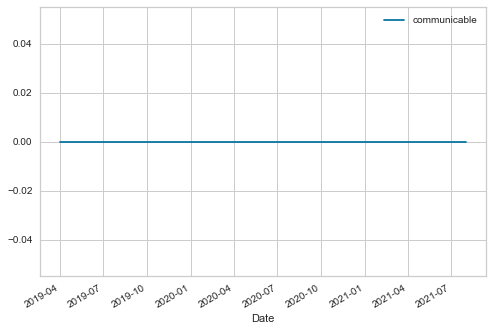

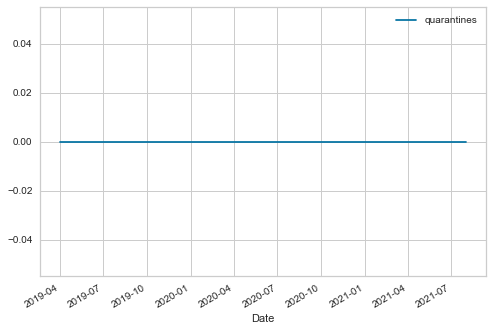

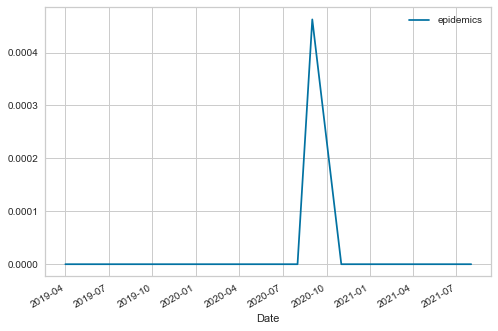

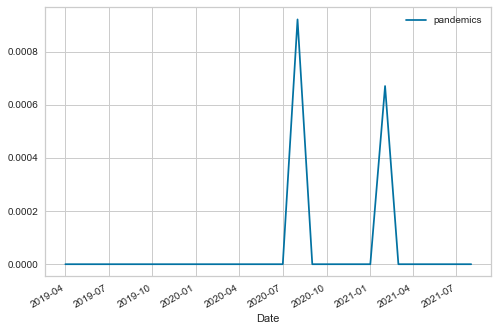

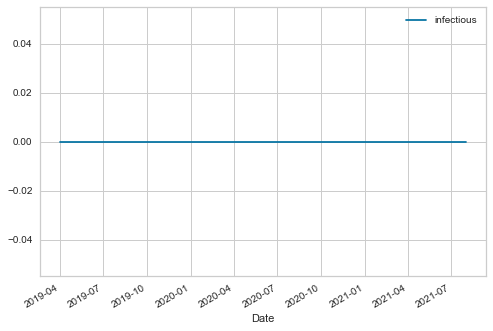

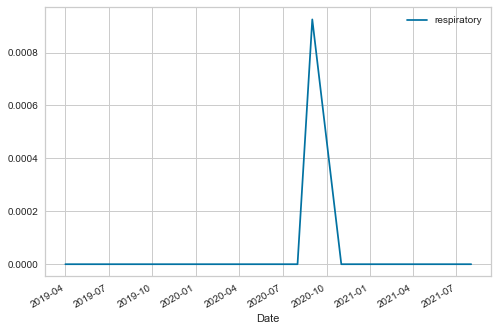

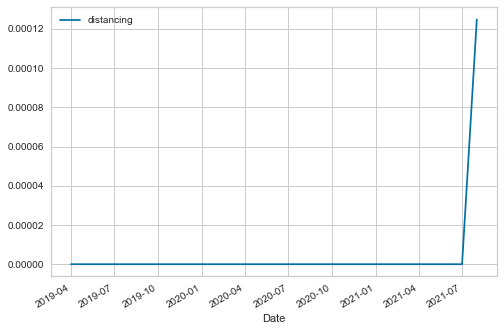

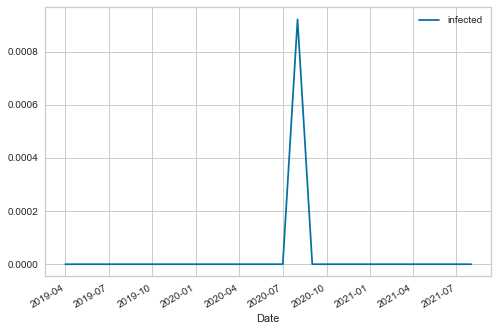

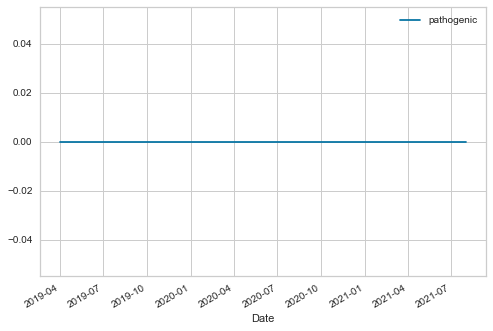

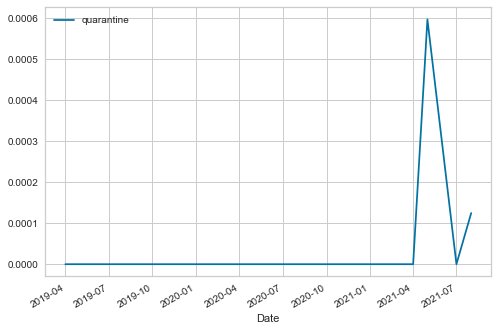

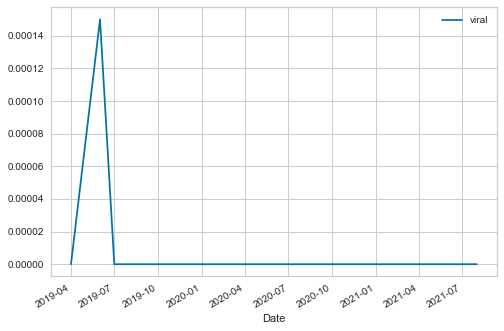

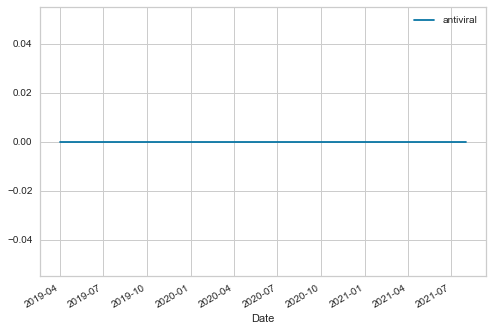

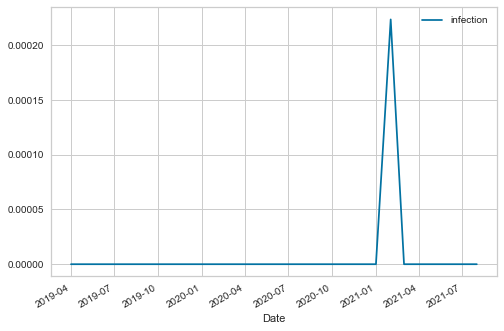

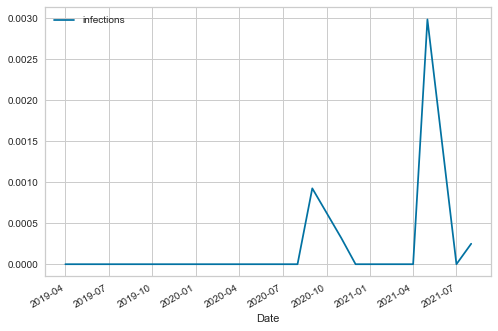

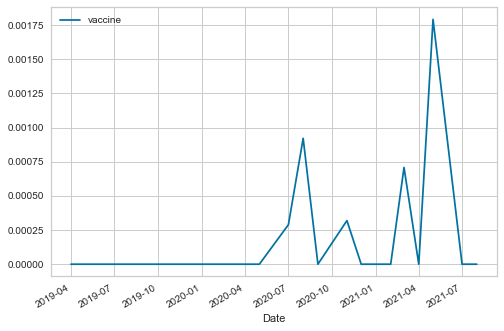

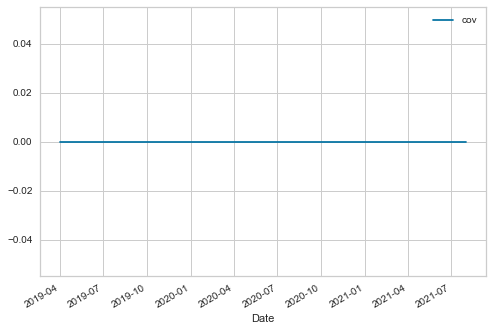

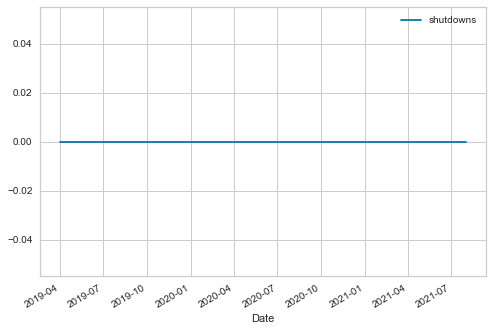

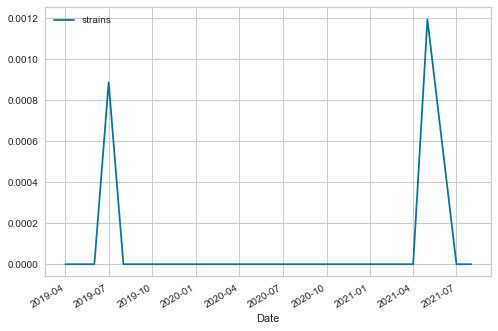

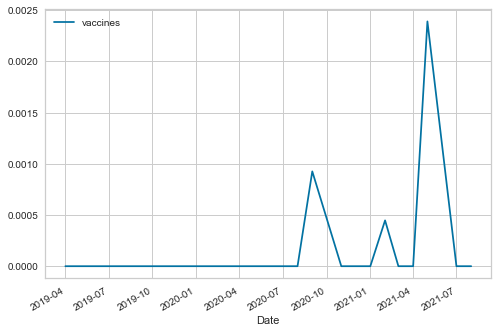

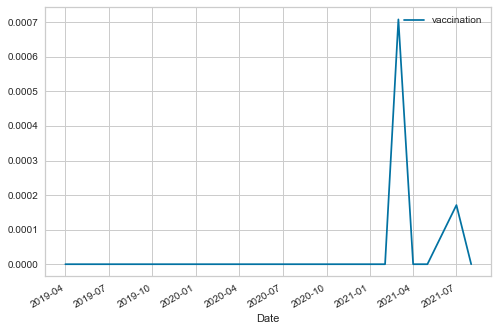

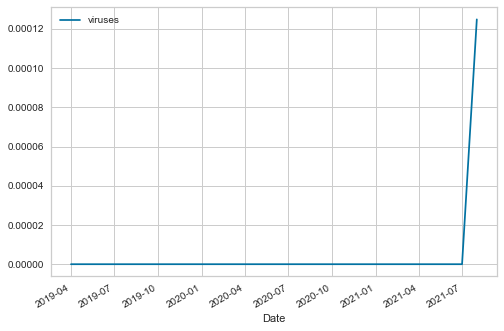

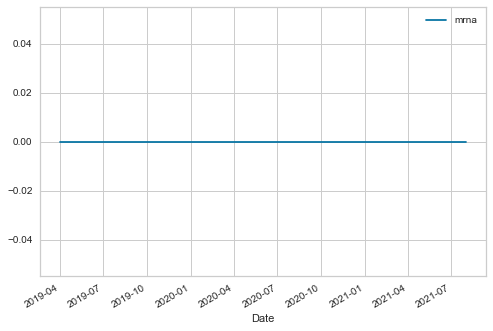

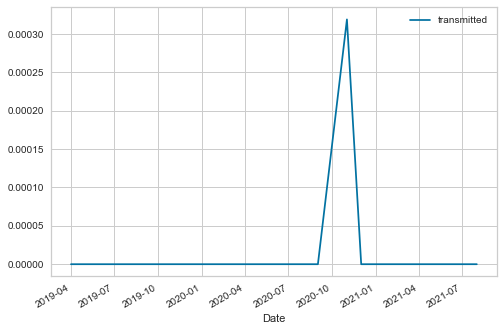

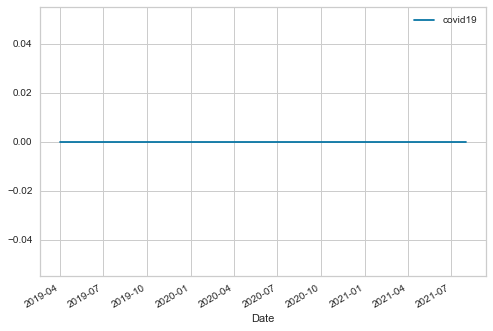

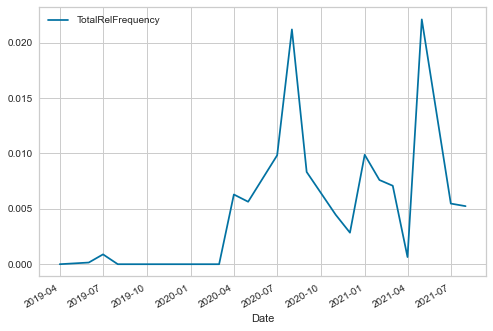

In [44]:
for i in range(1,37,1):
    FreqTable[FreqTable.columns[[i]]].plot(kind='line')

figure, axis = plt.subplots(3,2,figsize=(20,22))

for word in c_lex[0:6] :
    axis[0,0].plot(FreqTableFinal['Date'],FreqTableFinal[word])
    axis[0,0].set_xticklabels(FreqTableFinal['Date'], rotation=90)
axis[0,0].legend(c_lex[0:6])

for word in c_lex[6:12] :
    axis[0,1].plot(FreqTableFinal['Date'],FreqTableFinal[word])
    axis[0,1].set_xticklabels(FreqTableFinal['Date'], rotation=90)
axis[0,1].legend(c_lex[6:12])

for word in c_lex[12:18] :
    axis[1,0].plot(FreqTableFinal['Date'],FreqTableFinal[word])
    axis[1,0].set_xticklabels(FreqTableFinal['Date'], rotation=90)
axis[1,0].legend(c_lex[12:18])

for word in c_lex[18:24] :
    axis[1,1].plot(FreqTableFinal['Date'],FreqTableFinal[word])
    axis[1,1].set_xticklabels(FreqTableFinal['Date'], rotation=90)
axis[1,1].legend(c_lex[18:24])

for word in c_lex[24:30] :
    axis[2,0].plot(FreqTableFinal['Date'],FreqTableFinal[word])
    axis[2,0].set_xticklabels(FreqTableFinal['Date'], rotation=90)
axis[2,0].legend(c_lex[24:30])

for word in c_lex[30:35] :
    axis[2,1].plot(FreqTableFinal['Date'],FreqTableFinal[word])
    axis[2,1].set_xticklabels(FreqTableFinal['Date'], rotation=90)
axis[2,1].legend(c_lex[30:34])


# Covid Data:

In [75]:
covid_data = pd.read_csv('owid-covid-data.csv')
covid_new = covid_data[["iso_code",'date','new_cases','new_cases_smoothed']]
covid_ind = covid_new[covid_new["iso_code"] == 'IND']

In [76]:
covid_ind.index = pd.to_datetime(covid_ind['date'])

In [77]:
covid_ind = covid_ind.drop(['date','iso_code'],axis=1)

In [78]:
rolling_mean_case = FreqTable.TotalRelFrequency.rolling(window=3).mean()
rolling_mean_cov = covid_ind.new_cases.rolling(window=3).mean()

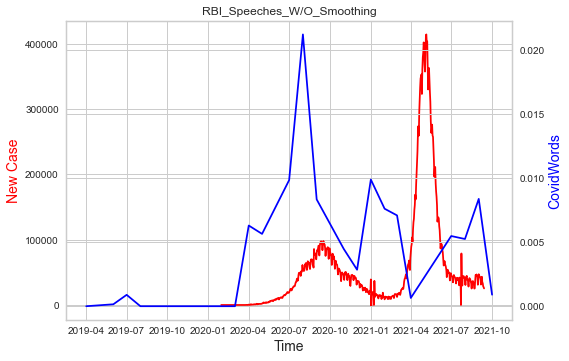

In [79]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(covid_ind.new_cases, color="red")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("New Case",color="red",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(FreqTable.TotalRelFrequency,color="blue")
ax2.set_ylabel("CovidWords",color="blue",fontsize=14)
plt.title('RBI_Speeches_W/O_Smoothing')
plt.show()

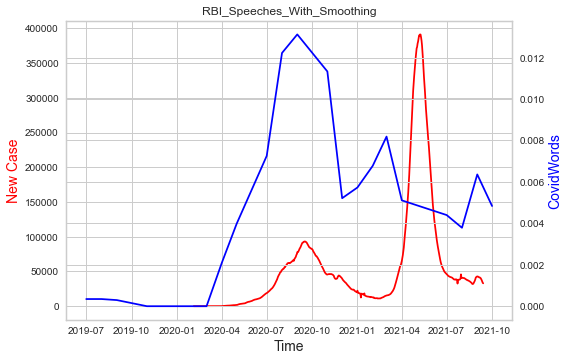

In [80]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(covid_ind.new_cases_smoothed, color="red")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("New Case",color="red",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(rolling_mean_case,color="blue")
ax2.set_ylabel("CovidWords",color="blue",fontsize=14)
plt.title('RBI_Speeches_With_Smoothing')
plt.show()

# 100 words before and 100 words after covid lexicon:

In [236]:
rbi_speeches['before_after_words'] = "will be filled"

In [237]:
running=[]
lst=[]
lst1=[]
for j in range(0,len(rbi_speeches),1) :
    
    for word in c_lex :
        
        for i in range(0,len(rbi_speeches['content_tokenized'][j])) :
            
            if rbi_speeches['content_tokenized'][j][i] == word :
                
                if i<101 :
                    
                    running = rbi_speeches['content_tokenized'][j][(i-i):(i+100):1]
                    print("Row ID: ",j,",Word position: ",i,",Word: ",word)
                    
                elif i>(len(rbi_speeches['content_tokenized'][j])-100) :
                    
                    running = rbi_speeches['content_tokenized'][j][(i-100):(len(rbi_speeches['content_tokenized'][j])):1]
                    print("Row ID: ",j,",Word position: ",i,",Word: ",word)
                    
                else :
                    
                    running = rbi_speeches['content_tokenized'][j][(i-100):(i+100):1]
                    print("Row ID: ",j,",Word position: ",i,",Word: ",word)
        
            if len(running) > 0 :
                lst.append(running)
                running = []
        
        if len(lst) > 0:
            lst1.append(lst)
            lst = []
    
    rbi_speeches.loc[j,"before_after_words"] = lst1
    lst1=[]

Row ID:  7 ,Word position:  138 ,Word:  viral
Row ID:  8 ,Word position:  1164 ,Word:  strains
Row ID:  28 ,Word position:  111 ,Word:  pandemic
Row ID:  28 ,Word position:  1127 ,Word:  pandemic
Row ID:  28 ,Word position:  1924 ,Word:  pandemic
Row ID:  28 ,Word position:  807 ,Word:  covid
Row ID:  28 ,Word position:  22 ,Word:  covid19
Row ID:  28 ,Word position:  110 ,Word:  covid19
Row ID:  28 ,Word position:  276 ,Word:  covid19
Row ID:  28 ,Word position:  770 ,Word:  covid19
Row ID:  29 ,Word position:  175 ,Word:  pandemic
Row ID:  29 ,Word position:  1201 ,Word:  pandemic
Row ID:  29 ,Word position:  2008 ,Word:  pandemic
Row ID:  29 ,Word position:  875 ,Word:  covid
Row ID:  29 ,Word position:  16 ,Word:  covid19
Row ID:  29 ,Word position:  85 ,Word:  covid19
Row ID:  29 ,Word position:  174 ,Word:  covid19
Row ID:  29 ,Word position:  336 ,Word:  covid19
Row ID:  29 ,Word position:  837 ,Word:  covid19
Row ID:  29 ,Word position:  2506 ,Word:  covid19
Row ID:  30 ,Word p

# Sentiment Score

In [81]:
score_speeches = rbi_speeches[['date','content_clean','content_tokenized','w/o_num_lemm']]

# Loughran_Polarity

In [82]:
score_speeches['Loughran_Polarity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_speeches),1):
    tokens = lm.tokenize(score_speeches['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_speeches.loc[i,'Loughran_Polarity'] = score.get('Polarity')

<ipython-input-82-b1c7dc01b4bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Loughran_Polarity'] = "will be filled"


# Loughran_Subjectivity

In [83]:
score_speeches['Loughran_Subjectivity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_speeches),1):
    tokens = lm.tokenize(score_speeches['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_speeches.loc[i,'Loughran_Subjectivity'] = score.get("Subjectivity")

<ipython-input-83-eb52bee319fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Loughran_Subjectivity'] = "will be filled"


# NRC_Polarity

In [84]:
score_speeches['NRC_Polarity'] = "will be filled"
p1 = 0
n1 = 0

for i in range(0,len(score_speeches),1):
    
    for j in range(0,len(score_speeches['w/o_num_lemm'][i]),1):
        
        score = NRCLex(score_speeches['w/o_num_lemm'][i][j]).raw_emotion_scores
        
        p = score.get("positive")
        # print('pos :',p)
        if p == 1 :
            p1 = p1 + 1
        else :
            p1 = p1
        
        n = score.get("negative")
        # print('neg :',n)
        if n == 1 :
            n1 = n1 + 1
        else :
            n1 = n1
            
    if (p1 + n1) == 0 :
        score_speeches.loc[i,'NRC_Polarity'] = "Null"
        
    else :
        score_speeches.loc[i,'NRC_Polarity'] = (p1 - n1)/(p1 + n1)
    p1 = 0
    n1 = 0        

<ipython-input-84-33e0ce217925>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['NRC_Polarity'] = "will be filled"


# Financial Stability Score

In [85]:
finstab = pd.read_excel('E:/NLP_PROJECT/Finstab.xlsx')

In [86]:
finstab_set_pos = {word for word in finstab.loc[finstab['Positive'] == 1]['Word']}

In [87]:
finstab_set_neg = {word for word in finstab.loc[finstab['Negative'] == 1]['Word']}

In [88]:
score_speeches['Financial_Stab_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches),1):
    
    for j in range(0,len(score_speeches['w/o_num_lemm'][i]),1):
        
        set_word = {word for word in score_speeches['w/o_num_lemm'][i]}
        pos_set = finstab_set_pos.intersection(set_word)
        neg_set = finstab_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
      
    if (p + n) == 0 :
        score_speeches.loc[i,'Financial_Stab_Score'] = "Null"
        
    else :
        score_speeches.loc[i,'Financial_Stab_Score'] = (p - n)/(p + n)
    # print("Row No:",i)

<ipython-input-88-6ddbeff334c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Financial_Stab_Score'] = "will be filled"


# Sentiword Score

In [89]:
score_speeches['Sentiword_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches),1):
    text = score_speeches['w/o_num_lemm'][i]
    tagged_sent = pos_tag(text)
    store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
    
    for word,tag in store_it:
        
        if(tag=='NOUN'):
            tag='n'
        elif(tag=='VERB'):
            tag='v'
        elif(tag=='ADJ'):
            tag='a'
        elif(tag=='ADV'):
            tag ='r'
        else:
            tag='nothing'
    
        concat = word+'.'+tag+'.01'
    
        try:
            p1 = swn.senti_synset(concat).pos_score()
            n1 = swn.senti_synset(concat).neg_score()
        except:
            print('Null')
            
        p = p + p1
        n = n + n1
    
    if (p + n) == 0 :
        score_speeches.loc[i,'Sentiword_Score'] = "Null"
        
    else :
        score_speeches.loc[i,'Sentiword_Score'] = ((p - n)/(p + n))
    p = 0
    n = 0

<ipython-input-89-263a6d5507ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Sentiword_Score'] = "will be filled"


Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null


# Hu & Liu Score

In [90]:
huliu = pd.read_csv('E:/NLP_PROJECT/huliu.csv')

In [91]:
huliu_set_pos = {word for word in huliu.loc[huliu['y'] == 1]['x']}

In [92]:
huliu_set_neg = {word for word in huliu.loc[huliu['y'] == -1]['x']}

In [93]:
score_speeches['Hu & Liu Polarity'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches),1):
    
    for j in range(0,len(score_speeches['w/o_num_lemm'][i]),1):
        
        set_word = {word for word in score_speeches['w/o_num_lemm'][i]}
        pos_set = huliu_set_pos.intersection(set_word)
        neg_set = huliu_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
    if (p + n) == 0 :
        score_speeches.loc[i,'Hu & Liu Polarity'] = "Null"
        
    else :
        score_speeches.loc[i,'Hu & Liu Polarity'] = (p - n)/(p + n)
    # print("Row No:",i)

<ipython-input-93-d7bcdf5b0c4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Hu & Liu Polarity'] = "will be filled"


# Loughran Uncertainty

In [94]:
loughran = pd.read_csv('E:/NLP_PROJECT/loughran.csv')

In [95]:
loughran_word = {word for word in loughran['word']}

In [96]:
score_speeches['Loughran_Uncertainty'] = "will be filled"
p = 0

for i in range(0,len(score_speeches),1):
    for j in range(0,len(score_speeches['w/o_num_lemm'][i]),1):
        set_word = {word for word in score_speeches['w/o_num_lemm'][i]}
        set_total = loughran_word.intersection(set_word)
        p = len(set_total)
    
    score_speeches.loc[i,'Loughran_Uncertainty'] = (p)/(len(score_speeches['w/o_num_lemm'][i]))
    # print("Row No:",i)    

In [97]:
score_col = [i for i in range(4,11,1)]

In [98]:
for i in range(4,11,1) :
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(FreqTable.TotalRelFrequency, color="red")
    # set x-axis label
    ax.set_xlabel("Time",fontsize=14)
    # set y-axis label
    ax.set_ylabel("RelFreqCovidWords",color="red",fontsize=14)
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(score_speeches[score_speeches.columns[[i]]],color="blue")
    ax2.set_ylabel(score_speeches.columns[i],color="blue",fontsize=14)
    plt.title('RBI_Speeches')
    a = score_speeches.columns[i]+'RBI_Speeches'+".jpg"
    plt.savefig(a)
    plt.show()

ValueError: view limit minimum -36903.200000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36903.200000000004 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 576x396 with 2 Axes>

In [61]:
# score_speeches[score_speeches.columns[score_col]].to_csv('score_speeches.csv')

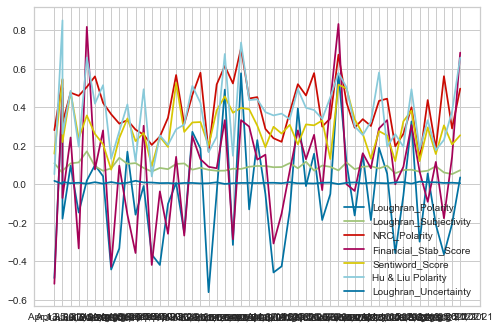

In [63]:
plt.plot(score_speeches['date'],score_speeches[score_speeches.columns[score_col]])
plt.legend([names for names in score_speeches.columns[score_col]])

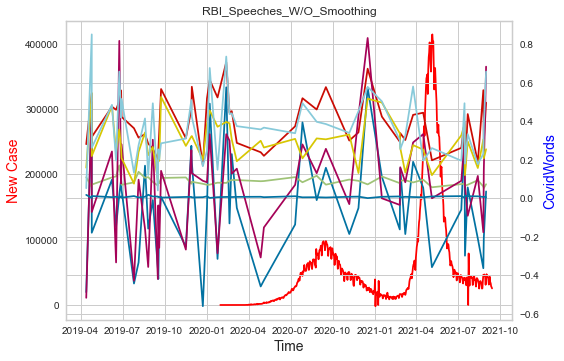

In [64]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(covid_ind.new_cases, color="red")
# set x-axis label
ax.set_xlabel("Time",fontsize=14)
# set y-axis label
ax.set_ylabel("New Case",color="red",fontsize=14)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(score_speeches[score_speeches.columns[score_col]])
ax2.set_ylabel("CovidWords",color="blue",fontsize=14)
plt.title('RBI_Speeches_W/O_Smoothing')
plt.show()

# Merging : 

In [258]:
rbi_speeches_gov = rbi_speeches[rbi_speeches['speaker_name'] == 'Shaktikanta Das, Governor,']

In [259]:
score_speeches_merge = rbi_speeches_gov[['date','content_clean']]

In [260]:
score_speeches_merge = score_speeches_merge.reset_index()
score_speeches_merge = score_speeches_merge[['date','content_clean']]

In [262]:
for i in range(0,len(score_speeches_merge),1):
    score_speeches_merge.loc[i,"date"] = score_speeches_merge['date'][i][2:5:]+str(",")+score_speeches_merge['date'][i][10:14:]

In [263]:
score_speeches_merge['content_clean'] = score_speeches_merge.groupby(['date'])['content_clean'].transform(lambda x : ' '.join(x))
score_speeches_merge = score_speeches_merge.drop_duplicates()
score_speeches_merge = score_speeches_merge.reset_index(drop=True)

In [264]:
score_speeches_merge['content_tokenized'] = score_speeches_merge['content_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [265]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

score_speeches_merge['content_tokenized'] = score_speeches_merge['content_tokenized'].apply(lambda x: remove_stopwords(x))

In [266]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

score_speeches_merge['content_tokenized'] = score_speeches_merge['content_tokenized'].apply(lambda x: lemmatizing(x))

In [267]:
wolist = []
for i in range(0,len(score_speeches_merge),1) :
    
    for j in range(0,len(score_speeches_merge['content_tokenized'][i]),1) :
        
        text = score_speeches_merge['content_tokenized'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    score_speeches_merge.at[i,'content_tokenized'] = wolist
    wolist=[]

In [268]:
def short_remove_new(x):
    
    sh_list = []

    for j in range(0,len(score_speeches_merge),1) :
    
        for i in range(0,len(score_speeches_merge[x][j])) :
        
            if len(score_speeches_merge[x][j][i]) > 2:
            
                main = score_speeches_merge[x][j][i]
                sh_list.append(main)
    
        score_speeches_merge.at[j,x] = sh_list
        sh_list=[]

In [269]:
short_remove_new('content_tokenized')

# Sentiment Score

# Loughran_Polarity

In [270]:
score_speeches_merge['Loughran_Polarity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_speeches_merge),1):
    tokens = lm.tokenize(score_speeches_merge['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_speeches_merge.loc[i,'Loughran_Polarity'] = score.get('Polarity')

# Loughran_Subjectivity

In [271]:
score_speeches_merge['Loughran_Subjectivity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_speeches_merge),1):
    tokens = lm.tokenize(score_speeches_merge['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_speeches_merge.loc[i,'Loughran_Subjectivity'] = score.get("Subjectivity")

# NRC_Polarity

In [272]:
score_speeches_merge['NRC_Polarity'] = "will be filled"
p1 = 0
n1 = 0

for i in range(0,len(score_speeches_merge),1):
    
    for j in range(0,len(score_speeches_merge['content_tokenized'][i]),1):
        
        score = NRCLex(score_speeches_merge['content_tokenized'][i][j]).raw_emotion_scores
        
        p = score.get("positive")
        # print('pos :',p)
        if p == 1 :
            p1 = p1 + 1
        else :
            p1 = p1
        
        n = score.get("negative")
        # print('neg :',n)
        if n == 1 :
            n1 = n1 + 1
        else :
            n1 = n1
            
    if (p1 + n1) == 0 :
        score_speeches_merge.loc[i,'NRC_Polarity'] = "Null"
        
    else :
        score_speeches_merge.loc[i,'NRC_Polarity'] = (p1 - n1)/(p1 + n1)
    p1 = 0
    n1 = 0        

# Financial Stability Score

In [273]:
finstab = pd.read_excel('E:/NLP_PROJECT/Finstab.xlsx')

In [274]:
finstab_set_pos = {word for word in finstab.loc[finstab['Positive'] == 1]['Word']}

In [275]:
finstab_set_neg = {word for word in finstab.loc[finstab['Negative'] == 1]['Word']}

In [276]:
score_speeches_merge['Financial_Stab_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches_merge),1):
    
    for j in range(0,len(score_speeches_merge['content_tokenized'][i]),1):
        
        set_word = {word for word in score_speeches_merge['content_tokenized'][i]}
        pos_set = finstab_set_pos.intersection(set_word)
        neg_set = finstab_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
      
    if (p + n) == 0 :
        score_speeches_merge.loc[i,'Financial_Stab_Score'] = "Null"
        
    else :
        score_speeches_merge.loc[i,'Financial_Stab_Score'] = (p - n)/(p + n)
    print("Row No:",i)

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24


# Sentiword Score

In [277]:
score_speeches_merge['Sentiword_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches_merge),1):
    text = score_speeches_merge['content_tokenized'][i]
    tagged_sent = pos_tag(text)
    store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
    
    for word,tag in store_it:
        
        if(tag=='NOUN'):
            tag='n'
        elif(tag=='VERB'):
            tag='v'
        elif(tag=='ADJ'):
            tag='a'
        elif(tag=='ADV'):
            tag ='r'
        else:
            tag='nothing'
    
        concat = word+'.'+tag+'.01'
    
        try:
            p1 = swn.senti_synset(concat).pos_score()
            n1 = swn.senti_synset(concat).neg_score()
        except:
            print('Null')
            
        p = p + p1
        n = n + n1
    
    if (p + n) == 0 :
        score_speeches_merge.loc[i,'Sentiword_Score'] = "Null"
        
    else :
        score_speeches_merge.loc[i,'Sentiword_Score'] = ((p - n)/(p + n))
    p = 0
    n = 0

Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null


# Hu & Liu Score

In [278]:
huliu = pd.read_csv('E:/NLP_PROJECT/huliu.csv')

In [279]:
huliu_set_pos = {word for word in huliu.loc[huliu['y'] == 1]['x']}

In [280]:
huliu_set_neg = {word for word in huliu.loc[huliu['y'] == -1]['x']}

In [281]:
score_speeches_merge['Hu & Liu Polarity'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches_merge),1):
    
    for j in range(0,len(score_speeches_merge['content_tokenized'][i]),1):
        
        set_word = {word for word in score_speeches_merge['content_tokenized'][i]}
        pos_set = huliu_set_pos.intersection(set_word)
        neg_set = huliu_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
    if (p + n) == 0 :
        score_speeches_merge.loc[i,'Hu & Liu Polarity'] = "Null"
        
    else :
        score_speeches_merge.loc[i,'Hu & Liu Polarity'] = (p - n)/(p + n)
    print("Row No:",i)

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24


# Loughran Uncertainty

In [282]:
loughran = pd.read_csv('E:/NLP_PROJECT/loughran.csv')

In [283]:
loughran_word = {word for word in loughran['word']}

In [284]:
score_speeches_merge['Loughran_Uncertainty'] = "will be filled"
p = 0

for i in range(0,len(score_speeches_merge),1):
    for j in range(0,len(score_speeches_merge['content_tokenized'][i]),1):
        set_word = {word for word in score_speeches_merge['content_tokenized'][i]}
        set_total = loughran_word.intersection(set_word)
        p = len(set_total)
    
    score_speeches_merge.loc[i,'Loughran_Uncertainty'] = (p)/(len(score_speeches_merge['content_tokenized'][i]))
    print("Row No:",i)    

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24


In [285]:
score_speeches_merge.index = pd.to_datetime(score_speeches_merge['date'])

In [286]:
score_speeches_merge.to_csv('score_speeches_merge_gov.csv')

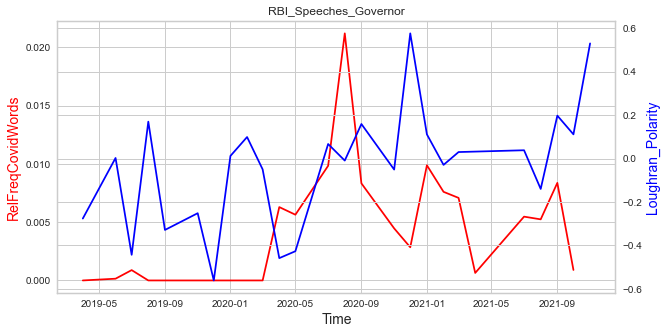

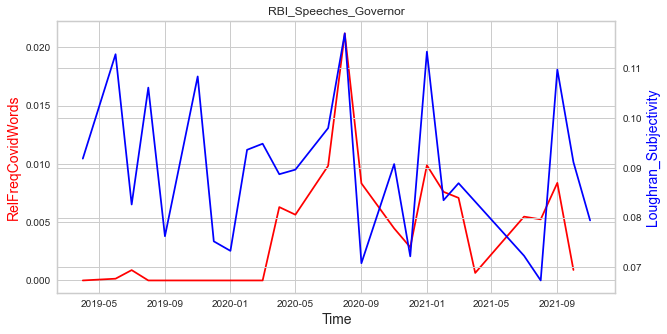

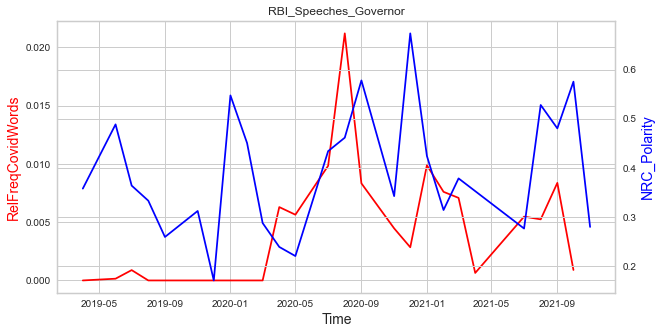

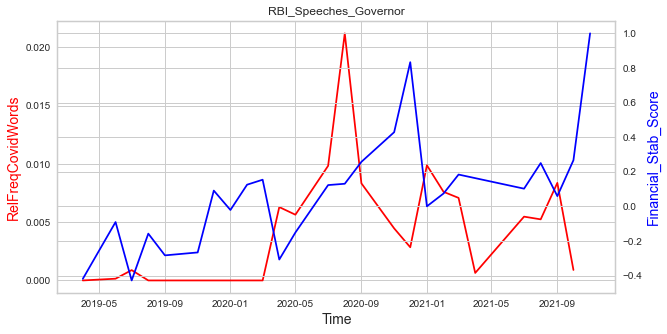

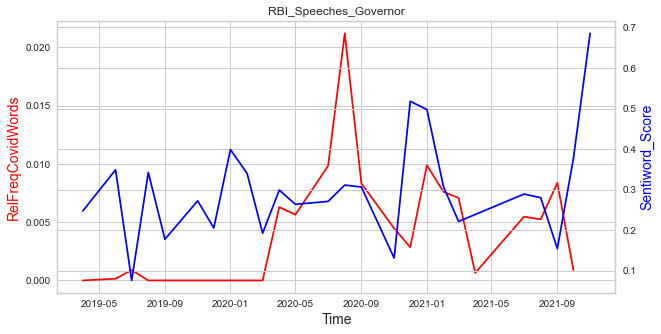

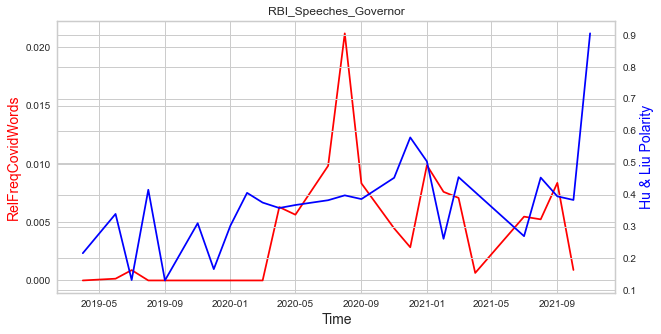

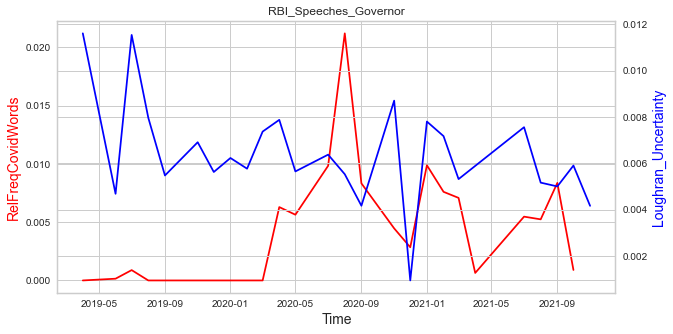

In [287]:
for i in range(3,10,1) :
    plt.rcParams['figure.figsize'] = 10, 5
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(FreqTable.TotalRelFrequency, color="red")
    # set x-axis label
    ax.set_xlabel("Time",fontsize=14)
    # set y-axis label
    ax.set_ylabel("RelFreqCovidWords",color="red",fontsize=14)
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(score_speeches_merge[score_speeches_merge.columns[[i]]],color="blue")
    ax2.set_ylabel(score_speeches_merge.columns[i],color="blue",fontsize=14)
    plt.title('RBI_Speeches_Governor')
    a = score_speeches_merge.columns[i]+'RBI_Speeches_gov'+".jpg"
    plt.savefig(a)
    plt.show()

# Cobined :

In [372]:
scoreofspeeches = pd.read_csv('score_speeches_merge.csv')
scoreofspeeches.index = pd.to_datetime(scoreofspeeches['date'])

In [383]:
scoreofspeeches.columns[11]

IndexError: index 11 is out of bounds for axis 0 with size 11

In [288]:
scoreofspeeches = pd.read_csv('score_speeches_merge_gov.csv')
scoreofspeeches.index = pd.to_datetime(scoreofspeeches['date'])

scoreofpressrelease = pd.read_csv('score_press_release_merge.csv')
scoreofpressrelease.index = pd.to_datetime(scoreofpressrelease['date'])

scoreofmpc = pd.read_csv('score_mpc_merge.csv')
scoreofmpc.index = pd.to_datetime(scoreofmpc['date'])

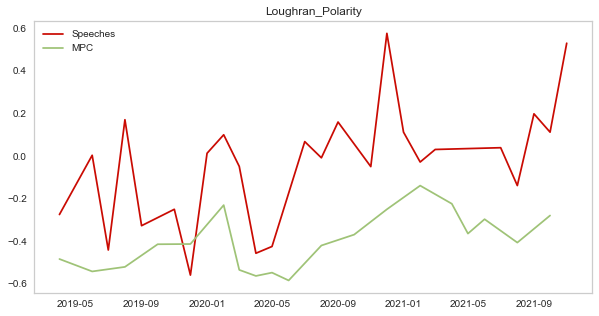

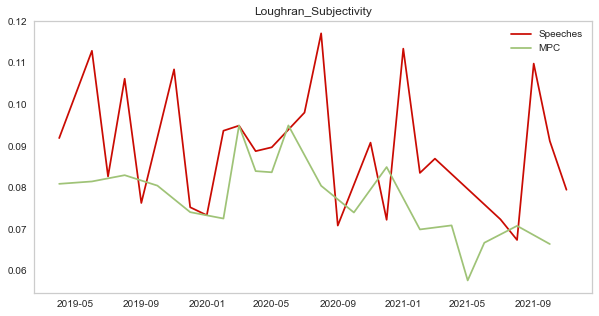

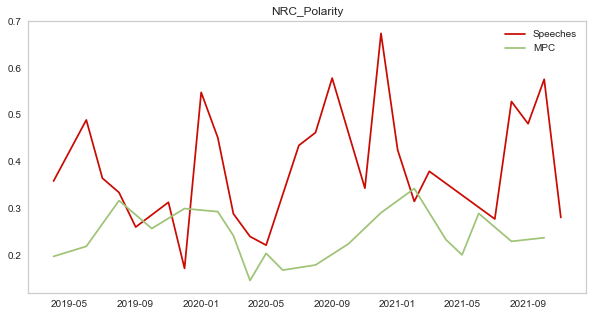

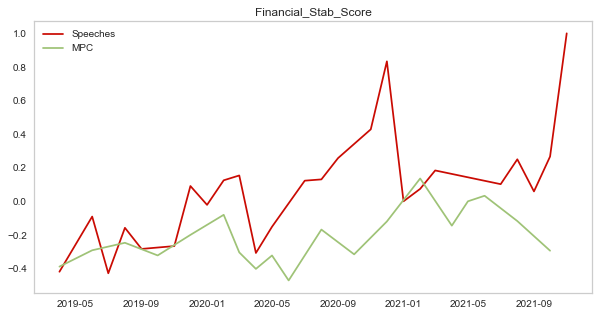

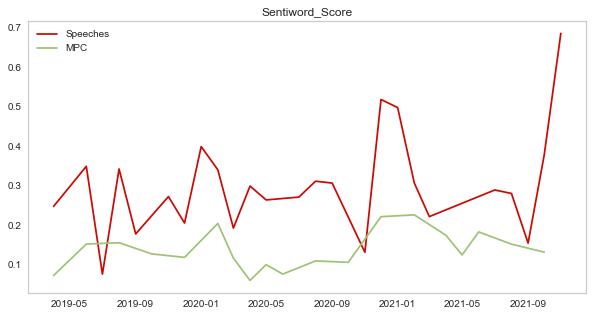

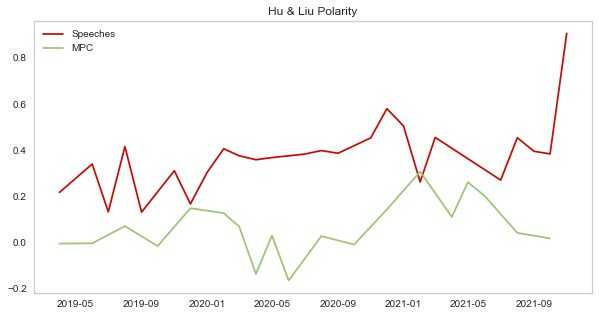

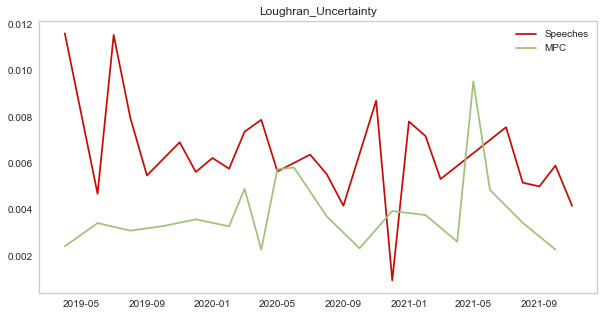

In [290]:
for i in range(4,11,1):
    plt.plot(scoreofspeeches[scoreofspeeches.columns[[i]]], color='r', label='Speeches')
    #plt.plot(scoreofpressrelease[scoreofpressrelease.columns[[i]]], color='b', label='PressRelease')
    plt.plot(scoreofmpc[scoreofmpc.columns[[i]]], color='g', label='MPC')
    plt.title(scoreofspeeches.columns[i])
    plt.legend()
    plt.grid()
    a = scoreofspeeches.columns[i]+"_combined_new"+".jpg"
    plt.savefig(a)
    plt.show()

# Merging by Date : 

In [301]:
rbi_speeches_gov = rbi_speeches[rbi_speeches['speaker_name'] == 'Shaktikanta Das, Governor,']

In [302]:
score_speeches_merge_date = rbi_speeches_gov[['date','content_clean']]
score_speeches_merge_date = score_speeches_merge_date.reset_index(drop=True)

In [304]:
score_speeches_merge_date['content_tokenized'] = score_speeches_merge_date['content_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [305]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

score_speeches_merge_date['content_tokenized'] = score_speeches_merge_date['content_tokenized'].apply(lambda x: remove_stopwords(x))

In [306]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

score_speeches_merge_date['content_tokenized'] = score_speeches_merge_date['content_tokenized'].apply(lambda x: lemmatizing(x))

In [307]:
wolist = []
for i in range(0,len(score_speeches_merge_date),1) :
    
    for j in range(0,len(score_speeches_merge_date['content_tokenized'][i]),1) :
        
        text = score_speeches_merge_date['content_tokenized'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    score_speeches_merge_date.at[i,'content_tokenized'] = wolist
    wolist=[]

In [308]:
def short_remove_new(x):
    
    sh_list = []

    for j in range(0,len(score_speeches_merge_date),1) :
    
        for i in range(0,len(score_speeches_merge_date[x][j])) :
        
            if len(score_speeches_merge_date[x][j][i]) > 2:
            
                main = score_speeches_merge_date[x][j][i]
                sh_list.append(main)
    
        score_speeches_merge_date.at[j,x] = sh_list
        sh_list=[]

In [309]:
short_remove_new('content_tokenized')

# Sentiment Score

# Loughran_Polarity

In [310]:
score_speeches_merge_date['Loughran_Polarity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_speeches_merge_date),1):
    tokens = lm.tokenize(score_speeches_merge_date['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_speeches_merge_date.loc[i,'Loughran_Polarity'] = score.get('Polarity')

# Loughran_Subjectivity

In [311]:
score_speeches_merge_date['Loughran_Subjectivity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_speeches_merge_date),1):
    tokens = lm.tokenize(score_speeches_merge_date['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_speeches_merge_date.loc[i,'Loughran_Subjectivity'] = score.get("Subjectivity")

# NRC_Polarity

In [312]:
score_speeches_merge_date['NRC_Polarity'] = "will be filled"
p1 = 0
n1 = 0

for i in range(0,len(score_speeches_merge_date),1):
    
    for j in range(0,len(score_speeches_merge_date['content_tokenized'][i]),1):
        
        score = NRCLex(score_speeches_merge_date['content_tokenized'][i][j]).raw_emotion_scores
        
        p = score.get("positive")
        # print('pos :',p)
        if p == 1 :
            p1 = p1 + 1
        else :
            p1 = p1
        
        n = score.get("negative")
        # print('neg :',n)
        if n == 1 :
            n1 = n1 + 1
        else :
            n1 = n1
            
    if (p1 + n1) == 0 :
        score_speeches_merge_date.loc[i,'NRC_Polarity'] = "Null"
        
    else :
        score_speeches_merge_date.loc[i,'NRC_Polarity'] = (p1 - n1)/(p1 + n1)
    p1 = 0
    n1 = 0        

# Financial Stability Score

In [313]:
finstab = pd.read_excel('E:/NLP_PROJECT/Finstab.xlsx')

In [314]:
finstab_set_pos = {word for word in finstab.loc[finstab['Positive'] == 1]['Word']}

In [315]:
finstab_set_neg = {word for word in finstab.loc[finstab['Negative'] == 1]['Word']}

In [316]:
score_speeches_merge_date['Financial_Stab_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches_merge_date),1):
    
    for j in range(0,len(score_speeches_merge_date['content_tokenized'][i]),1):
        
        set_word = {word for word in score_speeches_merge_date['content_tokenized'][i]}
        pos_set = finstab_set_pos.intersection(set_word)
        neg_set = finstab_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
      
    if (p + n) == 0 :
        score_speeches_merge_date.loc[i,'Financial_Stab_Score'] = "Null"
        
    else :
        score_speeches_merge_date.loc[i,'Financial_Stab_Score'] = (p - n)/(p + n)
    print("Row No:",i)

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24
Row No: 25
Row No: 26
Row No: 27
Row No: 28
Row No: 29
Row No: 30
Row No: 31
Row No: 32
Row No: 33
Row No: 34
Row No: 35
Row No: 36
Row No: 37
Row No: 38
Row No: 39


# Sentiword Score

In [317]:
score_speeches_merge_date['Sentiword_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches_merge_date),1):
    text = score_speeches_merge_date['content_tokenized'][i]
    tagged_sent = pos_tag(text)
    store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
    
    for word,tag in store_it:
        
        if(tag=='NOUN'):
            tag='n'
        elif(tag=='VERB'):
            tag='v'
        elif(tag=='ADJ'):
            tag='a'
        elif(tag=='ADV'):
            tag ='r'
        else:
            tag='nothing'
    
        concat = word+'.'+tag+'.01'
    
        try:
            p1 = swn.senti_synset(concat).pos_score()
            n1 = swn.senti_synset(concat).neg_score()
        except:
            print('Null')
            
        p = p + p1
        n = n + n1
    
    if (p + n) == 0 :
        score_speeches_merge_date.loc[i,'Sentiword_Score'] = "Null"
        
    else :
        score_speeches_merge_date.loc[i,'Sentiword_Score'] = ((p - n)/(p + n))
    p = 0
    n = 0

Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null


# Hu & Liu Score

In [318]:
huliu = pd.read_csv('E:/NLP_PROJECT/huliu.csv')

In [319]:
huliu_set_pos = {word for word in huliu.loc[huliu['y'] == 1]['x']}

In [320]:
huliu_set_neg = {word for word in huliu.loc[huliu['y'] == -1]['x']}

In [321]:
score_speeches_merge_date['Hu & Liu Polarity'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches_merge_date),1):
    
    for j in range(0,len(score_speeches_merge_date['content_tokenized'][i]),1):
        
        set_word = {word for word in score_speeches_merge_date['content_tokenized'][i]}
        pos_set = huliu_set_pos.intersection(set_word)
        neg_set = huliu_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
    if (p + n) == 0 :
        score_speeches_merge_date.loc[i,'Hu & Liu Polarity'] = "Null"
        
    else :
        score_speeches_merge_date.loc[i,'Hu & Liu Polarity'] = (p - n)/(p + n)
    print("Row No:",i)

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24
Row No: 25
Row No: 26
Row No: 27
Row No: 28
Row No: 29
Row No: 30
Row No: 31
Row No: 32
Row No: 33
Row No: 34
Row No: 35
Row No: 36
Row No: 37
Row No: 38
Row No: 39


# Loughran Uncertainty

In [322]:
loughran = pd.read_csv('E:/NLP_PROJECT/loughran.csv')

In [323]:
loughran_word = {word for word in loughran['word']}

In [324]:
score_speeches_merge_date['Loughran_Uncertainty'] = "will be filled"
p = 0

for i in range(0,len(score_speeches_merge_date),1):
    for j in range(0,len(score_speeches_merge_date['content_tokenized'][i]),1):
        set_word = {word for word in score_speeches_merge_date['content_tokenized'][i]}
        set_total = loughran_word.intersection(set_word)
        p = len(set_total)
    
    score_speeches_merge_date.loc[i,'Loughran_Uncertainty'] = (p)/(len(score_speeches_merge_date['content_tokenized'][i]))
    print("Row No:",i)    

Row No: 0
Row No: 1
Row No: 2
Row No: 3
Row No: 4
Row No: 5
Row No: 6
Row No: 7
Row No: 8
Row No: 9
Row No: 10
Row No: 11
Row No: 12
Row No: 13
Row No: 14
Row No: 15
Row No: 16
Row No: 17
Row No: 18
Row No: 19
Row No: 20
Row No: 21
Row No: 22
Row No: 23
Row No: 24
Row No: 25
Row No: 26
Row No: 27
Row No: 28
Row No: 29
Row No: 30
Row No: 31
Row No: 32
Row No: 33
Row No: 34
Row No: 35
Row No: 36
Row No: 37
Row No: 38
Row No: 39


In [325]:
score_speeches_merge_date

,date,content_clean,content_tokenized,Loughran_Polarity,Loughran_Subjectivity,NRC_Polarity,Financial_Stab_Score,Sentiword_Score,Hu & Liu Polarity,Loughran_Uncertainty
0,"Apr 13, 2019",Thank you for inviting me to this forum I in...,"[thank, inviting, forum, intend, cover, global...",-0.487805,0.109333,0.28125,-0.517241,0.159117,0.052632,0.017641
1,"Apr 25, 2019",On behalf of the Reserve Bank of India I am ...,"[behalf, reserve, bank, india, delighted, welc...",0.478261,0.058524,0.544304,0.5,0.547619,0.851852,0.002119
2,"Jun 08, 2019",I am happy to be participating in the Fiftee...,"[happy, participating, fifteenth, annual, conv...",0.096774,0.108467,0.47619,0.243243,0.480048,0.485714,0.005828
3,"Jun 17, 2019",It gives me great pleasure to be here at the...,"[give, great, pleasure, lbsnaa, inauguration, ...",-0.146853,0.113763,0.460123,-0.333333,0.2379,0.195876,0.007968
4,"Jun 24, 2019",The Complaint Management System CMS the appl...,"[complaint, management, system, application, l...",0.019608,0.171141,0.505882,0.818182,0.357798,0.658537,0.003185
5,"Jun 28, 2019",I am honoured to inaugurate this year’s Stat...,"[honoured, inaugurate, year, statistic, day, c...",0.1,0.09375,0.560694,0.076923,0.261765,0.419355,0.010914
6,"Jul 26, 2019",I am delighted to be part of this event for ...,"[delighted, part, event, launch, shri, sriniva...",-0.443038,0.082636,0.364055,-0.428571,0.076099,0.13253,0.011535
7,"Aug 19, 2019",It is indeed a matter of great pleasure for ...,"[indeed, matter, great, pleasure, today, amids...",0.169591,0.106145,0.333333,-0.157895,0.342243,0.415094,0.007962
8,"Sep 16, 2019",Edited excerpts from the interview We are me...,"[edited, excerpt, interview, meeting, time, su...",-0.364865,0.066368,0.204762,-0.419355,0.09494,0.040816,0.00912
9,"Sep 17, 2019",Interviewer Mythili Bhusnurmath In the last ...,"[interviewer, mythili, bhusnurmath, last, mone...",-0.419355,0.085048,0.248157,-0.037037,0.247059,0.254237,0.006078


In [326]:
score_col_date = [0] + [i for i in range(3,10,1)]

In [328]:
score_speeches_merge_date[score_speeches_merge_date.columns[score_col_date]].to_csv('score_speeches_merge_date.csv')